# Result reporting 

In [1]:
import pandas as pd 
import wandb
import numpy as np 
import matplotlib.pyplot as plt 


def get_result(log_dir, pertur=False):
    with open(log_dir,'r') as f: 
        data = f.readlines()
    result = [] 
    if pertur:
        for epoch in data:
            result.append(eval(epoch))
    else:
        for epoch in data[:-1]:
            result.append(eval(epoch))
    return result 

def get_mmi(df):
    clean = df[df['pertur'] =='clean'][['test_txt_r_mean', 'test_img_r_mean','test_r_mean']]
    
    df['test_txt_mmi'] = df['test_txt_r_mean'].apply(lambda x : (x-clean['test_txt_r_mean']) / clean['test_txt_r_mean'])
    df['test_img_mmi'] = df['test_img_r_mean'].apply(lambda x : (x-clean['test_img_r_mean']) / clean['test_img_r_mean'])
    df['test_mmi'] = df['test_r_mean'].apply(lambda x : (x-clean['test_r_mean']) / clean['test_r_mean'])
    df.sort_values(by=['pertur_type','pertur'],inplace=True)
    
    return df 

mmi_columns = ['test_txt_mmi' ,'test_img_mmi' ,'test_mmi']
columns_order = ['jpeg_compression', 'elastic_transform', 'pixelate', 'contrast',
                 'brightness', 'snow', 'frost','fog',
                 'motion_blur','zoom_blur','glass_blur','defocus_blur',
                 'speckle_noise','impulse_noise','shot_noise','gaussian_noise',
                 'char_delete', 'char_swap','char_substitute','char_insert','char_ocr','char_keyboard',
                 'word_insert_punctuation', 'word_deletion', 'word_swap', 'word_insertion','word_synonym_replacement']


## VE 

In [80]:
data_dir = 'output/VE/Flickr30K/romixgen/VE-Flickr30K-romixgen/Eval_log.txt'
data = get_result(data_dir,True)
df = pd.DataFrame(data)
df = df.drop(columns = 'epoch').T
df.columns = df.iloc[2,:].values
clean = df.iloc[0]['clean']

## RE

In [2]:
clean_main = get_result('output/Retrieval/Flickr30K/clean/Retrieval-Flickr30K/main_log.txt')
mix_main = get_result('output/Retrieval/Flickr30K/mixgen/Retrieval-Flickr30K-mixgen/main_log.txt')
mix_mix = get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-mix_mix_fix-romixgen/main_log.txt')
romix_main = get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-romixgen/main_log.txt')

In [2]:
clean = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/clean/Retrieval-Flickr30K-double_random/Eval_log.txt', pertur=True)))
clean['train'] = 'clean'

mix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/mixgen/Retrieval-Flickr30K-mixgen/Eval_log.txt', pertur=True)))
mix['train'] = 'mixgen'

mix_mix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-double_random-romixgen/Eval_log.txt', pertur=True)))
mix_mix['train'] = 'mix_mix'

romix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-romixgen/Eval_log.txt', pertur=True)))
romix['train'] = 'romixgen'

df = pd.concat([clean,mix_mix,mix,romix]).reset_index(drop=True)

In [ ]:
df = pd.DataFrame(mix_main)
df = df.iloc[df['val_r_mean'].argmax()].reset_index().T
df.columns = df.iloc[0]

In [3]:
re_columns = ['test_txt_r1','test_txt_r5','test_txt_r10','test_txt_r_mean',
              'test_img_r1','test_img_r5','test_img_r10','test_img_r_mean',
              'test_r_mean']

In [22]:
df[re_columns].iloc[-1,:].reset_index()

,index,7
0,test_txt_r1,94.2
1,test_txt_r5,99.3
2,test_txt_r10,99.9
3,test_txt_r_mean,97.8
4,test_img_r1,82.5
5,test_img_r5,96.3
6,test_img_r10,98.06
7,test_img_r_mean,92.286667
8,test_r_mean,95.043333


In [5]:
clean_once = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-romixgen/Eval_log.txt', pertur=True)))
clean_once['train'] = 'clean'

clean_twice = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-double_random-romixgen/Eval_log.txt', pertur=True)))
clean_twice['train'] = 'clean'

In [8]:
temp = clean_once[['pertur', 'test_r_mean']].T
temp.columns = temp.iloc[0,:]
temp.iloc[-1,:][columns_order].reset_index()

,pertur,test_r_mean
0,jpeg_compression,93.093333
1,elastic_transform,88.37
2,pixelate,81.546667
3,contrast,94.04
4,brightness,94.67
5,snow,88.996667
6,frost,91.88
7,fog,93.48
8,motion_blur,91.44
9,zoom_blur,74.563333


In [9]:
temp = clean_twice[['pertur', 'test_r_mean']].T
temp.columns = temp.iloc[0,:]
temp.iloc[-1,:][columns_order].reset_index()

,pertur,test_r_mean
0,jpeg_compression,93.173333
1,elastic_transform,88.146667
2,pixelate,82.75
3,contrast,90.263333
4,brightness,94.573333
5,snow,86.473333
6,frost,85.483333
7,fog,87.863333
8,motion_blur,91.183333
9,zoom_blur,73.553333


## GR 

In [59]:
clean = pd.DataFrame(get_result('output/Grounding/COCO/romixgen/Grounding-COCO-romixgen/Eval_log.txt', pertur=True))
clean['average_score'] = clean.iloc[:,:3].values.mean(axis=1)
temp = clean[['pertur','average_score']].T
temp.columns = temp.iloc[0,:]

In [60]:
clean

,val_d,testA_d,testB_d,epoch,pertur_type,pertur,average_score
0,0.431930,0.471708,0.364696,0,Text,char_keyboard,0.422778
1,0.438993,0.488648,0.378196,0,Text,char_ocr,0.435279
2,0.433138,0.473978,0.360810,0,Text,char_insert,0.422642
3,0.431930,0.472057,0.360196,0,Text,char_substitute,0.421395
4,0.449865,0.503144,0.372878,0,Text,char_swap,0.441962
5,0.438714,0.479392,0.364696,0,Text,char_delete,0.427601
6,0.546696,0.621551,0.438945,0,Image,clean,0.535731
7,0.531549,0.613692,0.436695,0,Image,gaussian_noise,0.527312
8,0.532200,0.603388,0.440990,0,Image,shot_noise,0.525526
9,0.532014,0.601642,0.435263,0,Image,impulse_noise,0.522973


In [54]:
temp.iloc[1,:][np.array(columns_order)[pd.Series(columns_order).apply(lambda x : 'word' not in x)]].reset_index()

,pertur,average_score
0,jpeg_compression,0.514932
1,elastic_transform,0.480785
2,pixelate,0.474465
3,contrast,0.521355
4,brightness,0.533028
5,snow,0.477313
6,frost,0.492951
7,fog,0.51429
8,motion_blur,0.506438
9,zoom_blur,0.436642


## NLVR

In [3]:
clean_main = pd.DataFrame(get_result('output/NLVR/NLVR2/clean/NLVR-NLVR2/main_log.txt'))
mix_main = pd.DataFrame(get_result('output/NLVR/NLVR2/mixgen/NLVR-NLVR2-mixgen/main_log.txt'))
romix_main = pd.DataFrame(get_result('output/NLVR/NLVR2/romixgen/NLVR-NLVR2-romixgen/main_log.txt')).astype(np.float16)

In [8]:
mix_main.iloc[mix_main['val_acc'].argmax()]['test_acc']

0.8290757752963513

In [10]:
clean_dir = 'output/NLVR/NLVR2/mixgen/NLVR-NLVR2-mixgen/Eval_log.txt'
clean = pd.DataFrame(get_result(clean_dir,True))
clean = clean.drop_duplicates('pertur').reset_index(drop=True)
clean = clean.T
clean.columns = clean.iloc[3,:]
clean['snow'] = 0 
clean['frost'] = 0 
clean[columns_order].iloc[0,:].reset_index()

,pertur,test_acc
0,jpeg_compression,0.823766
1,elastic_transform,0.779133
2,pixelate,0.794489
3,contrast,0.827641
4,brightness,0.828932
5,snow,0
6,frost,0
7,fog,0.0
8,motion_blur,0.817451
9,zoom_blur,0.706659


# Result Viz 

# VE 실험 결과 

## clean 결과 

In [71]:
clean_main = get_result('output/VE/Flickr30K/clean/VE-Flickr30K/main_log.txt')
mix_main = get_result('output/VE/Flickr30K/mixgen/main_log.txt')
romix_main = get_result('output/VE/Flickr30K/romixgen/VE-Flickr30K-romixgen/main_log.txt')

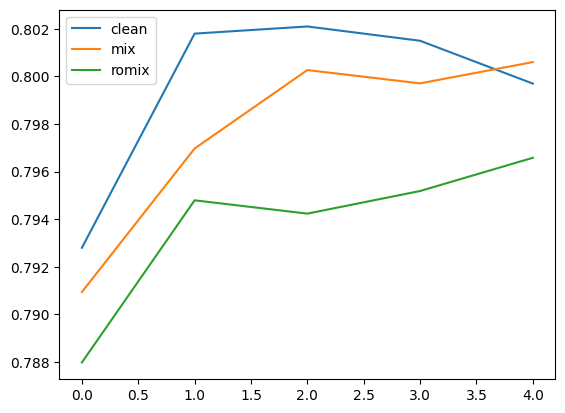

In [72]:
plt.plot(pd.Series(clean_main).apply(lambda x : float(x['test_acc'])).values,label='clean')
plt.plot(pd.Series(mix_main).apply(lambda x : float(x['test_acc'])).values,label='mix')
plt.plot(pd.Series(romix_main).apply(lambda x : float(x['test_acc'])).values,label='romix')
plt.legend()
plt.show()

## perturbation 

In [44]:
romix_base

test_acc             0.787735
epoch                       0
pertur_type             Image
pertur         gaussian_noise
Name: 0, dtype: object

In [49]:
clean = pd.DataFrame(get_result('output/VE/Flickr30K/clean/VE-Flickr30K/Eval_log.txt', pertur=True))
clean_base = float(clean.iloc[0]['test_acc'])
clean = clean.iloc[1:].reset_index(drop=True)

mix = pd.DataFrame(get_result('output/VE/Flickr30K/mixgen/Eval_log.txt', pertur=True)).iloc[1:].reset_index(drop=True)
mix_base = float(mix.iloc[0]['test_acc'])
mix = mix.iloc[1:].reset_index(drop=True)

romix = pd.DataFrame(get_result('output/VE/Flickr30K/romixgen/VE-Flickr30K-romixgen/Eval_log.txt', pertur=True)).iloc[1:].reset_index(drop=True)
romix_base = float(romix.iloc[0]['test_acc'])
romix = romix.iloc[1:].reset_index(drop=True)

clean['test_acc'] = clean['test_acc'].map(float)
mix['test_acc'] = mix['test_acc'].map(float)
romix['test_acc'] = romix['test_acc'].map(float)

clean['train'] = 'clean'
mix['train'] = 'mix'
romix['train'] = 'romix'

df = pd.concat([clean,mix,romix])

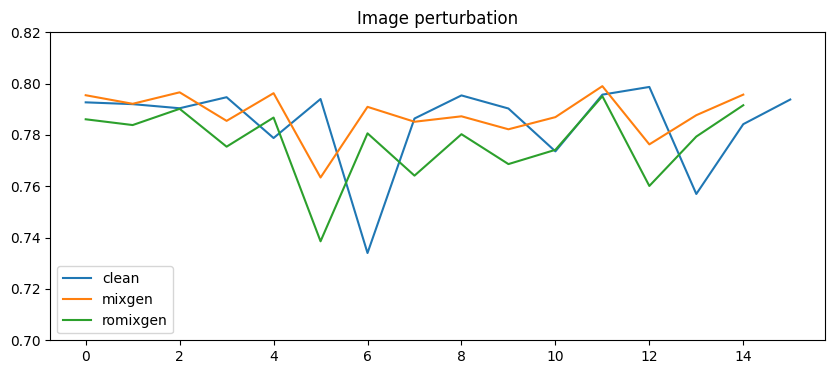

In [70]:
plt.figure(figsize=(10,4))

plt.ylim(0.7,0.82)
plt.plot(clean[clean['pertur_type'] == 'Image']['test_acc'], label='clean')
plt.plot(mix[mix['pertur_type'] == 'Image']['test_acc'], label = 'mixgen')
plt.plot(romix[romix['pertur_type'] == 'Image']['test_acc'], label='romixgen')

plt.legend()
plt.title('Image perturbation')
plt.show()

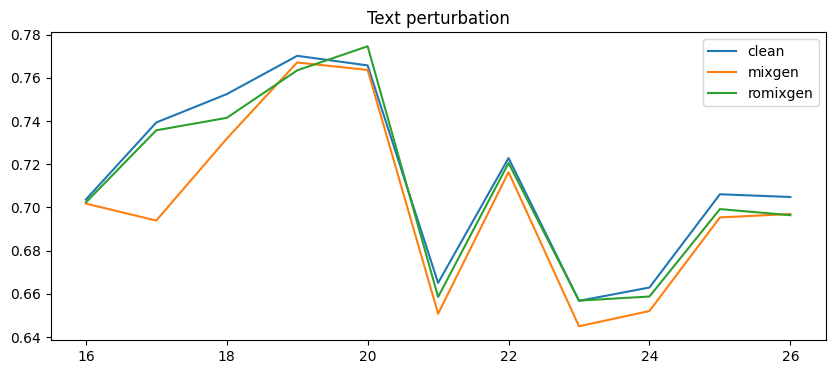

In [35]:
plt.figure(figsize=(10,4))
plt.plot(clean[clean['pertur_type'] == 'Text']['test_acc'], label='clean')
plt.plot(mix[mix['pertur_type'] == 'Text']['test_acc'], label = 'mixgen')
plt.plot(romix[romix['pertur_type'] == 'Text']['test_acc'], label='romixgen')
plt.legend()
plt.title('Text perturbation')
plt.show()

In [75]:
clean_test_mmi = clean[clean['pertur_type'] == 'Text']['test_acc'].apply(lambda x : x-clean_base).mean()
clean_image_mmi = clean[clean['pertur_type'] == 'Image']['test_acc'].apply(lambda x : x-clean_base).mean()

In [84]:
clean['mmi'] = clean['test_acc'].apply(lambda x : (x-clean_base)/ clean_base)
mix['mmi'] = mix['test_acc'].apply(lambda x : (x-mix_base)/ mix_base)
romix['mmi'] = romix['test_acc'].apply(lambda x : (x-romix_base)/ romix_base)

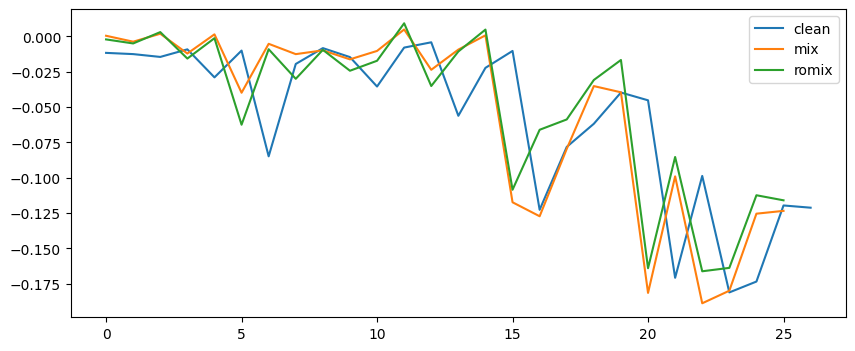

In [88]:
plt.figure(figsize=(10,4))
plt.plot(clean['mmi'],label='clean')
plt.plot(mix['mmi'],label='mix')
plt.plot(romix['mmi'],label='romix')
plt.legend()
plt.show()

In [118]:
labels = []
labels.extend(clean.groupby("pertur_type")["mmi"].mean().index)
labels.extend(mix.groupby("pertur_type")["mmi"].mean().index)
labels.extend(romix.groupby("pertur_type")["mmi"].mean().index)

height = [] 
height.extend(clean.groupby("pertur_type")["mmi"].mean().values)
height.extend(mix.groupby("pertur_type")["mmi"].mean().values)
height.extend(romix.groupby("pertur_type")["mmi"].mean().values)

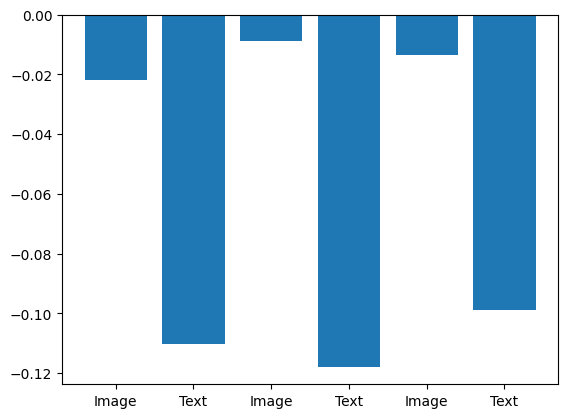

In [130]:
plt.bar(x = np.arange(len(height)), height= height)
plt.xticks(np.arange(len(height)), labels)
plt.show()

In [136]:
df

,test_acc,epoch,pertur_type,pertur,mmi,train
0,0.792700,0,Image,gaussian_noise,-0.011596,clean
1,0.792000,0,Image,shot_noise,-0.012469,clean
2,0.790400,0,Image,impulse_noise,-0.014464,clean
3,0.794700,0,Image,speckle_noise,-0.009102,clean
4,0.778800,0,Image,defocus_blur,-0.028928,clean
...,...,...,...,...,...,...
21,0.720574,0,Text,char_ocr,-0.085258,romix
22,0.656877,0,Text,char_insert,-0.166120,romix
23,0.658776,0,Text,char_substitute,-0.163709,romix
24,0.699249,0,Text,char_swap,-0.112330,romix


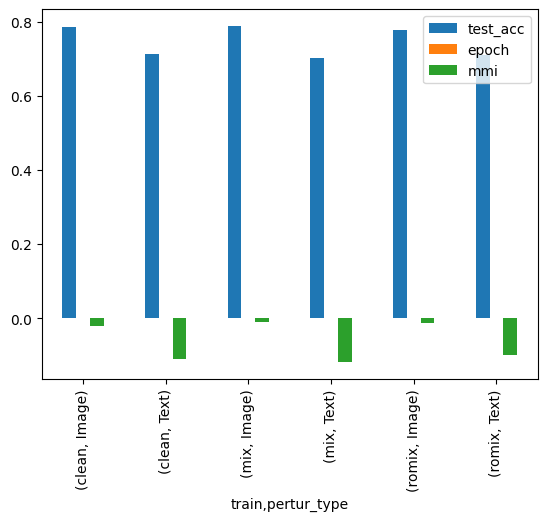

In [148]:
df.groupby(['train','pertur_type']).mean().plot(kind='bar')
plt.show()

# Retrieval - Flickr 결과 

## main result 

In [3]:
clean_main = get_result('output/Retrieval/Flickr30K/clean/Retrieval-Flickr30K/main_log.txt')
mix_main = get_result('output/Retrieval/Flickr30K/mixgen/Retrieval-Flickr30K-mixgen/main_log.txt')
#mix_mix = get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-mixgen-romixgen/main_log.txt')
romix_main = get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-romixgen/main_log.txt')

In [4]:
clean_best_result = pd.DataFrame(clean_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
mix_best_result = pd.DataFrame(mix_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
#mix_mix_best_result = pd.DataFrame(mix_mix).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
romix_best_result = pd.DataFrame(romix_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values

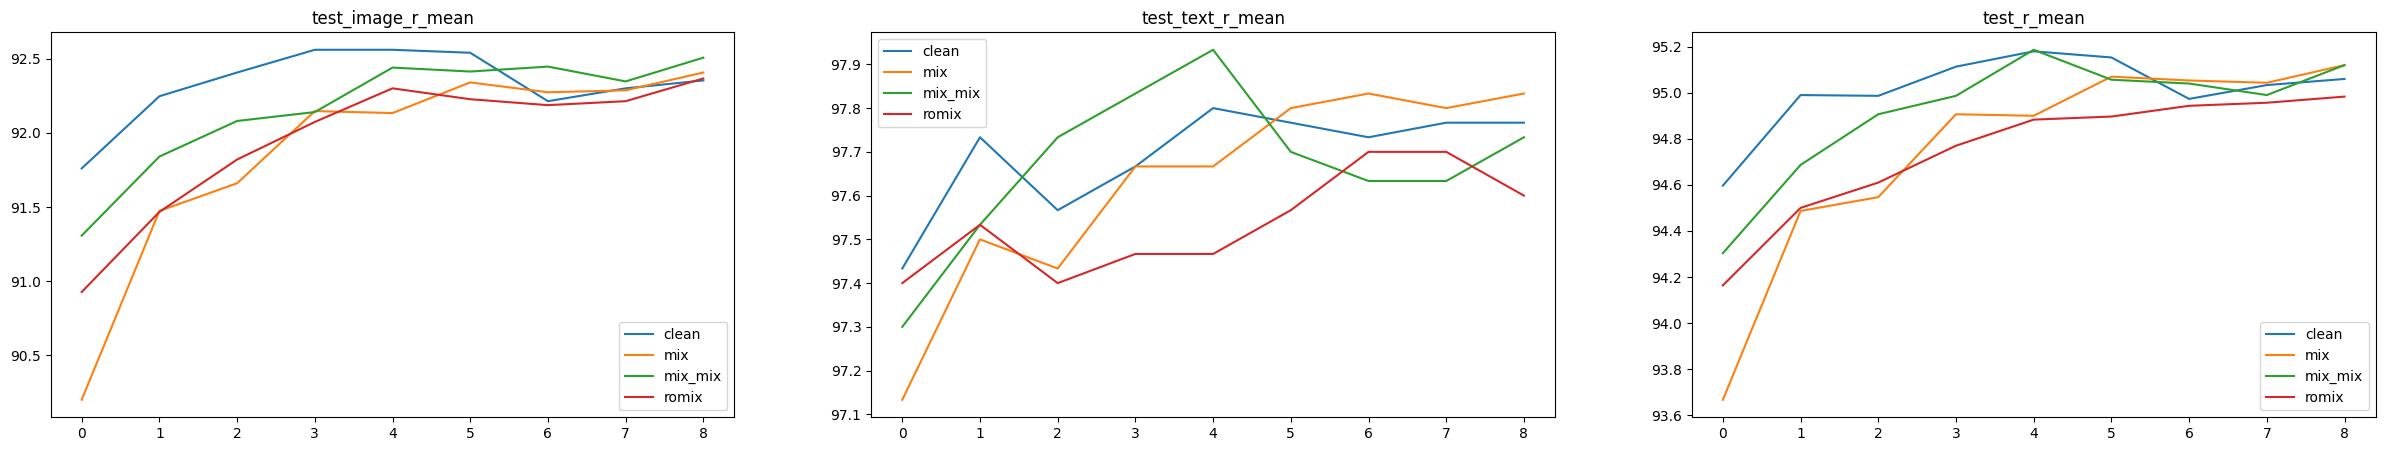

          test image r mean  test text r mean  test r mean
clean             92.540000         97.766667    95.153333
mixgen            92.340000         97.800000    95.070000
mix_mix           92.413333         97.700000    95.056667
romixgen          92.226667         97.566667    94.896667


In [6]:
f, axs = plt.subplots(1, 3, figsize=(30, 5))
axs[0].plot(pd.Series(clean_main).apply(lambda x : float(x['test_img_r_mean'])).values,label='clean')
axs[0].plot(pd.Series(mix_main).apply(lambda x : float(x['test_img_r_mean'])).values,label='mix')
axs[0].plot(pd.Series(mix_mix).apply(lambda x : float(x['test_img_r_mean'])).values,label='mix_mix')
axs[0].plot(pd.Series(romix_main).apply(lambda x : float(x['test_img_r_mean'])).values,label='romix')
axs[0].legend()
axs[0].set_title('test_image_r_mean')

axs[1].plot(pd.Series(clean_main).apply(lambda x : float(x['test_txt_r_mean'])).values,label='clean')
axs[1].plot(pd.Series(mix_main).apply(lambda x : float(x['test_txt_r_mean'])).values,label='mix')
axs[1].plot(pd.Series(mix_mix).apply(lambda x : float(x['test_txt_r_mean'])).values,label='mix_mix')
axs[1].plot(pd.Series(romix_main).apply(lambda x : float(x['test_txt_r_mean'])).values,label='romix')
axs[1].legend()
axs[1].set_title('test_text_r_mean')

axs[2].plot(pd.Series(clean_main).apply(lambda x : float(x['test_r_mean'])).values,label='clean')
axs[2].plot(pd.Series(mix_main).apply(lambda x : float(x['test_r_mean'])).values,label='mix')
axs[2].plot(pd.Series(mix_mix).apply(lambda x : float(x['test_r_mean'])).values,label='mix_mix')
axs[2].plot(pd.Series(romix_main).apply(lambda x : float(x['test_r_mean'])).values,label='romix')
axs[2].legend()
axs[2].set_title('test_r_mean')
plt.show()

clean_best_result = pd.DataFrame(clean_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
mix_best_result = pd.DataFrame(mix_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
mix__mix_best_result = pd.DataFrame(mix_mix).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values
romix_best_result = pd.DataFrame(romix_main).iloc[pd.DataFrame(clean_main)['val_r_mean'].argmax()][['test_img_r_mean', 'test_txt_r_mean', 'test_r_mean']].values

df = pd.DataFrame([clean_best_result,mix_best_result,mix__mix_best_result,romix_best_result])
df.rename(index = {0:'clean', 1: 'mixgen', 2:'mix_mix', 3:'romixgen'},inplace=True)
df.columns = ['test image r mean', 'test text r mean', 'test r mean']

print(df)


## robustness 

In [16]:
def get_mmi(df):
    clean = df[df['pertur'] =='clean'][['test_txt_r_mean', 'test_img_r_mean','test_r_mean']]
    
    df['test_txt_mmi'] = df['test_txt_r_mean'].apply(lambda x : (x-clean['test_txt_r_mean']) / clean['test_txt_r_mean'])
    df['test_img_mmi'] = df['test_img_r_mean'].apply(lambda x : (x-clean['test_img_r_mean']) / clean['test_img_r_mean'])
    df['test_mmi'] = df['test_r_mean'].apply(lambda x : (x-clean['test_r_mean']) / clean['test_r_mean'])
    df.sort_values(by=['pertur_type','pertur'],inplace=True)
    
    return df 

mmi_columns = ['test_txt_mmi' ,'test_img_mmi' ,'test_mmi']

In [18]:
clean = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/clean/Retrieval-Flickr30K/Eval_log.txt', pertur=True)))
clean['train'] = 'clean'

mix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/mixgen/Retrieval-Flickr30K-mixgen/Eval_log.txt', pertur=True)))
mix['train'] = 'mixgen'

# mix_mix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-mixgen-romixgen/Eval_log.txt', pertur=True)))
# mix_mix['train'] = 'mix_mix'

romix = get_mmi(pd.DataFrame(get_result('output/Retrieval/Flickr30K/romixgen/Retrieval-Flickr30K-romixgen/Eval_log.txt', pertur=True)))
romix['train'] = 'romixgen'

#df = pd.concat([clean,mix,mix_mix,romix]).reset_index(drop=True)
df = pd.concat([clean,mix,romix]).reset_index(drop=True)

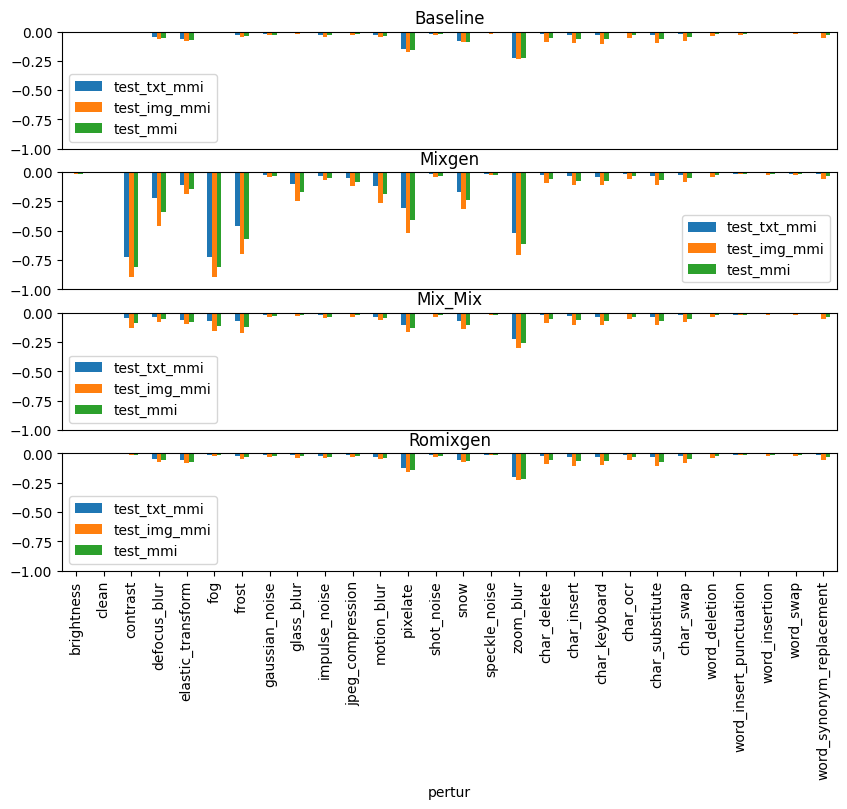

          test_txt_mmi  test_img_mmi  test_mmi
train                                         
clean        -0.033121     -0.057545 -0.044998
mix_mix      -0.035544     -0.077884 -0.056121
mixgen       -0.136631     -0.221450 -0.177820
romixgen     -0.029171     -0.057998 -0.043177


In [12]:
f, axs = plt.subplots(4, 1, figsize=(30, 5))
clean[['pertur', 'test_txt_mmi',	'test_img_mmi'	,'test_mmi']].plot(kind='bar',figsize=(10,7), ax=axs[0])
axs[0].xaxis.set_visible(False)
axs[0].set_ylim(-1,0)
axs[0].set_title('Baseline')

mix[['pertur', 'test_txt_mmi',	'test_img_mmi'	,'test_mmi']].plot(kind='bar',figsize=(10,7),  ax=axs[1])
axs[1].xaxis.set_visible(False)
axs[1].set_ylim(-1,0)
axs[1].set_title('Mixgen')

mix_mix[['pertur', 'test_txt_mmi',	'test_img_mmi'	,'test_mmi']].plot(kind='bar',figsize=(10,7),  ax=axs[2])
axs[2].xaxis.set_visible(False)
axs[2].set_ylim(-1,0)
axs[2].set_title('Mix_Mix')

romix[['pertur', 'test_txt_mmi',	'test_img_mmi'	,'test_mmi']].plot(kind='bar',figsize=(10,7), x='pertur', ax=axs[3])
axs[3].set_ylim(-1, 0)
axs[3].set_title('Romixgen')
plt.show()

clean_mmi = clean[['pertur','test_txt_mmi','test_img_mmi','test_mmi','train']]
mix_mmi = mix[['pertur','test_txt_mmi','test_img_mmi','test_mmi','train']]
mix_mix_mmi = mix_mix[['pertur','test_txt_mmi','test_img_mmi','test_mmi','train']]
romix_mmi = romix[['pertur','test_txt_mmi','test_img_mmi','test_mmi','train']]
print(pd.concat([clean_mmi,
            mix_mmi,
            mix_mix_mmi,
            romix_mmi]).groupby('train').mean())


In [330]:
df = pd.concat([clean_mmi.T,
           mix_mmi.drop(columns='pertur').T,
           romix_mmi.drop(columns='pertur').T]).set_axis(clean_mmi.T.iloc[0],axis=1).drop('pertur').reset_index().rename(index={
               0:'clean', 1:'clean', 2:'clean', 4:'mixgen', 5:'mixgen', 6:'mixgen', 8:'romixgen', 9:'romixgen',10:'romixgen'
           }).reset_index().sort_values(by=['index'], key=lambda x : x.map({'test_img_mmi':0, 'test_txt_mmi':1, 'test_mmi':2})).drop([3,7,11]).rename(columns={'level_0':'train','index':'metric'})
           
df = df.set_index(df.columns[0])

df

pertur,metric,brightness,clean,contrast,defocus_blur,elastic_transform,fog,frost,gaussian_noise,glass_blur,...,char_insert,char_keyboard,char_ocr,char_substitute,char_swap,word_deletion,word_insert_punctuation,word_insertion,word_swap,word_synonym_replacement
train,,,,,,,,,,,,,,,,,,,,,
clean,test_img_mmi,-0.006412,0.0,-0.011887,-0.067214,-0.081766,-0.014408,-0.043585,-0.032058,-0.019307,...,-0.10129,-0.103091,-0.052014,-0.100137,-0.07694,-0.037461,-0.026799,-0.012823,-0.020316,-0.051293
mixgen,test_img_mmi,-0.018178,0.0,-0.893097,-0.456683,-0.182212,-0.892015,-0.69552,-0.04393,-0.245474,...,-0.109139,-0.108346,-0.054029,-0.10712,-0.080935,-0.038303,-0.018611,-0.025536,-0.025463,-0.054173
romixgen,test_img_mmi,-0.004188,0.0,-0.016391,-0.07228,-0.08145,-0.021301,-0.046574,-0.030905,-0.035165,...,-0.108889,-0.102246,-0.052784,-0.109539,-0.081667,-0.037259,-0.016102,-0.020435,-0.01964,-0.053433
clean,test_txt_mmi,-0.006478,0.0,-0.008524,-0.047392,-0.06103,-0.008183,-0.031367,-0.020457,-0.008524,...,-0.025571,-0.031026,-0.012956,-0.027276,-0.016706,-0.009206,-0.013979,-0.002728,-0.004773,-0.011933
mixgen,test_txt_mmi,-0.008172,0.0,-0.721485,-0.223698,-0.10589,-0.727613,-0.45795,-0.022472,-0.100102,...,-0.034729,-0.039837,-0.019408,-0.033027,-0.020769,-0.006469,-0.019408,-0.007491,-0.012598,-0.012257
romixgen,test_txt_mmi,-0.003071,0.0,-0.004435,-0.046742,-0.059024,-0.011259,-0.02013,-0.016718,-0.016035,...,-0.029,-0.029,-0.011941,-0.032071,-0.018424,-0.006824,-0.011941,-0.003071,-0.00853,-0.009212
clean,test_mmi,-0.006446,0.0,-0.010159,-0.057031,-0.071113,-0.01121,-0.037308,-0.026098,-0.013767,...,-0.062391,-0.066069,-0.031948,-0.062706,-0.045996,-0.022945,-0.020213,-0.007637,-0.012331,-0.031073
mixgen,test_mmi,-0.013031,0.0,-0.80482,-0.336836,-0.142952,-0.807447,-0.573315,-0.032892,-0.170695,...,-0.070863,-0.073105,-0.03622,-0.069007,-0.049986,-0.021928,-0.019021,-0.016253,-0.018845,-0.032612
romixgen,test_mmi,-0.003614,0.0,-0.010244,-0.05915,-0.06992,-0.016138,-0.032978,-0.023611,-0.02533,...,-0.067815,-0.064587,-0.031785,-0.06971,-0.049151,-0.021611,-0.013963,-0.011507,-0.013928,-0.030697
